# TP Simulations de Variables Aléatoires

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import numpy.random as nprd
from scipy.stats import norm,cauchy
from IPython.display import clear_output
normal_d,cauchy_d = norm(),cauchy()
from time import time

## Partie 1 

**A partir de l'inverse généralisée de la fonction de répartition**

L'inverse généralisé de F est donné par : 
$F^-1 = -\dfrac{1}{\lambda} ln(1-u)$

Text(0.5, 1.0, "Echantillons d'une variable aléatoire exponetielle")

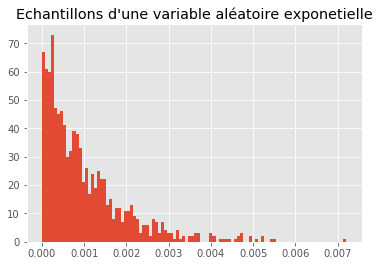

In [2]:

def simulation_echantillons(n=1000,Lambda=2,norm=1):
    tab_echantillons=[]
    for i in range(n):
        u=np.random.uniform()
        tab_echantillons.append(((-1/Lambda)*np.log(1-u))/norm)
    return tab_echantillons

plt.style.use('ggplot')
particules=simulation_echantillons(1000,2)
sum=np.sum(particules)
particules=[p/sum for p in particules]
plt.hist(particules,bins=100)
plt.title("Echantillons d'une variable aléatoire exponetielle")      

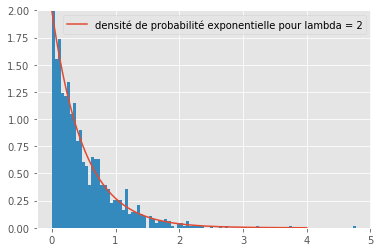

In [3]:
norm = lambda a : a/1000
x=np.linspace(0,4,1000)
f=2*np.exp(-2*x)
plt.figure()
plt.plot(x,f,label='densité de probabilité exponentielle pour lambda = 2')
particules=simulation_echantillons(1000,2)
plt.hist(particules,bins=100,density=True)
plt.ylim(0,2)
plt.legend()

On constate que les échantillons normalisés approchent l'aire sous la courbe de densité. 
Pour N tend vers l'infini on montre que la somme des aires de l'histogramme tend vers l'aire sous la courbe.\
Le problème de cette méthode est qu'elle demande une grande quantité d'achantillons pour estimer l'aire sous la courbe.



## Partie 2

In [4]:
M=5
N_sample = 10000
def Accept_Reject(M=5,N_sample = 10000):
    X_gen=[]
    for j in range(N_sample):
        u = nprd.uniform()
        x = nprd.standard_cauchy()
        while 1/M*normal_d.pdf(x)/cauchy_d.pdf(x) < u:
            u=nprd.uniform()
            x=nprd.standard_cauchy()
        X_gen.append(x)
    return(X_gen)



    

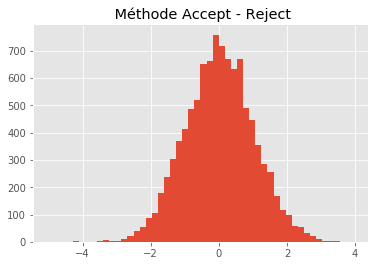

In [5]:
X_gen = Accept_Reject()
plt.style.use("ggplot")
plt.hist(X_gen,bins= N_sample//200)
plt.title(" Méthode Accept - Reject")
plt.show()

Text(0.5, 1.0, ' Loi normale centrée réduite')

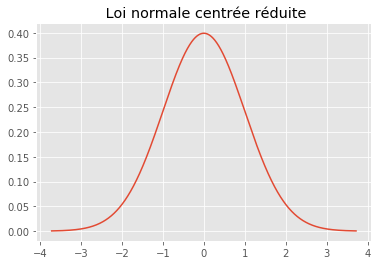

In [8]:
t=np.linspace(normal_d.ppf(0.0001),normal_d.ppf(0.9999),10000)
X=normal_d.pdf(t)
plt.plot(t,X)
plt.title(" Loi normale centrée réduite")

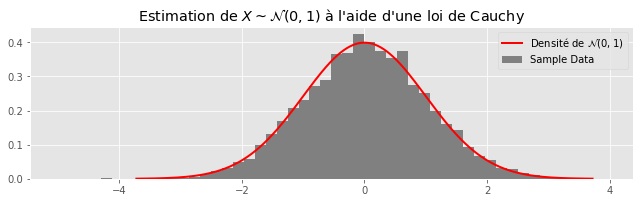

In [9]:
plt.figure(figsize=[2*5.4, 1*2.8])
plt.hist(X_gen,bins= N_sample//200,color="grey",label="Sample Data",density=True)
plt.plot(t,X,color = "red",label="Densité de $\mathcal{N} (0,1)$",linewidth=2)
plt.title("Estimation de $X \sim \mathcal{N} (0,1)$ à l'aide d'une loi de Cauchy ")
plt.legend()
plt.show()

On constate qu'on approche bien une loi Normale centrée réduite. Ainsi, la méthode $\textit{Accept-reject}$ est une bonne méthode pour générer de nombres aléatoires d'une densité connue à l'aide d'un autre générateur de nombres aléatoires, aussi de densité connue. \
On pourra discuter de l'influence de $M$ qui correspond à  l'inverse de la probabilité que x soit accepté est égale.

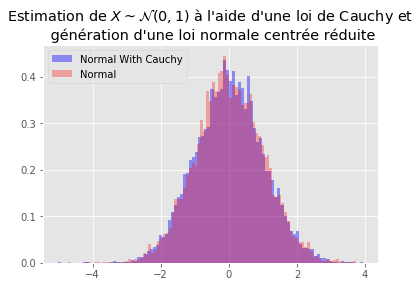

In [11]:
plt.figure()
X_norm=normal_d.rvs(size=N_sample)
plt.hist(X_gen,bins= N_sample//100,color="blue",label="Normal With Cauchy",alpha = 0.4,density=True)
plt.hist(X_norm,bins= N_sample//100,color="red",label="Normal",alpha = 0.3,density=True)
plt.title("Estimation de $X \sim \mathcal{N} (0,1)$ à l'aide d'une loi de Cauchy et \n génération d'une loi normale centrée réduite")
plt.legend()
plt.show()

Qualitativement, on remarque bien que les deux histogrammes se supperposent et on en déduit qu'on a bien un générateur d'une loi normale à partir d'un générateur de nombres aléatoires suivant une loi de Cauchy

### Discussion selon le paramètre $M$

Temps d'exécution pour M = 1 vaut 3.957317590713501 secondes


<Figure size 432x288 with 0 Axes>

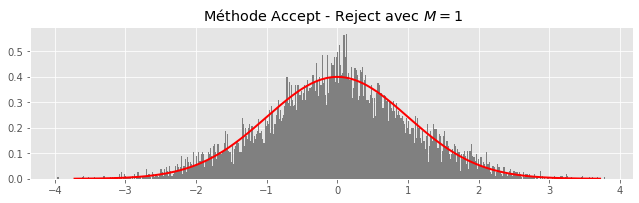

Temps d'exécution pour M = 2 vaut 7.095177173614502 secondes


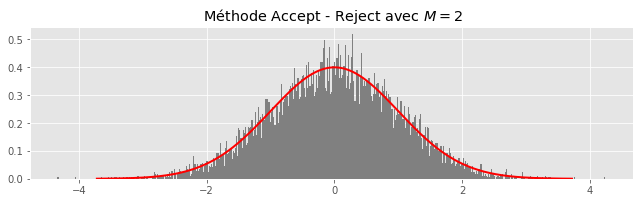

Temps d'exécution pour M = 4 vaut 12.246325969696045 secondes


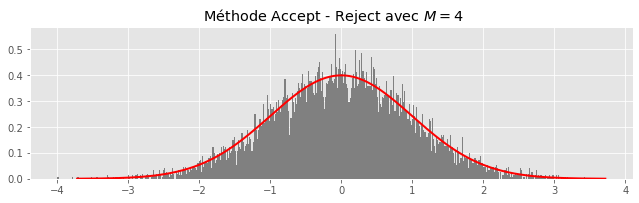

Temps d'exécution pour M = 8 vaut 24.146491527557373 secondes


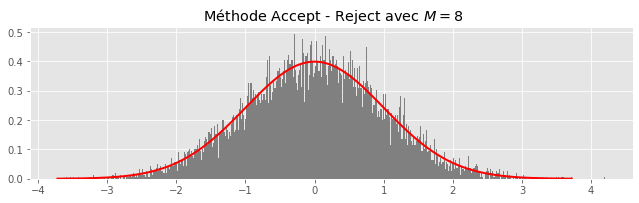

Temps d'exécution pour M = 16 vaut 49.12071967124939 secondes


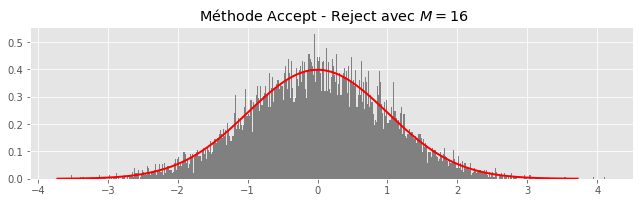

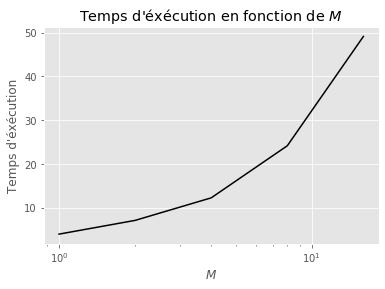

In [15]:
m = [1,2,4,8,16]
plt.figure()
T_exec=[]
for _,M in enumerate(m):
    plt.figure(figsize=[2*5.4, 1.5*2.8])
    t_deb=time()
    X_gen = Accept_Reject(M)
    t_exec = time()-t_deb
    plt.hist(X_gen,bins= N_sample//20,color="grey",label="Sample Data",density=True)
    
    T_exec.append(t_exec)
    print(f"Temps d'exécution pour M = {M} vaut {t_exec} secondes" )
    plt.plot(t,X,color = "red",label="Densité de $\mathcal{N} (0,1)$",linewidth=2)
    plt.title(f" Méthode Accept - Reject avec $M={M}$")
    plt.show()
plt.figure()
plt.plot(m,T_exec,color = "black")
plt.xlabel("$M$");plt.ylabel("Temps d'éxécution");plt.title("Temps d'éxécution en fonction de $M$")
plt.semilogx()
plt.show()

Plus M est grand, mieux on approxime la loi mais plus le temps d'exécution augmente

# 3 Algorithme de Box-Muller


In [14]:
N_sample = 10000
def Box_Muller(N_sample = 10000):
    X_gen,Y_gen=[],[]
    for j in range(N_sample):
        u1 = nprd.uniform()
        u2=nprd.uniform()
        R= -2*np.log(u1)
        V=2*np.pi*u2
        X_gen.append(np.sqrt(R)*np.cos(V))
        Y_gen.append(np.sqrt(R)*np.sin(V))
    return(X_gen,Y_gen)



    

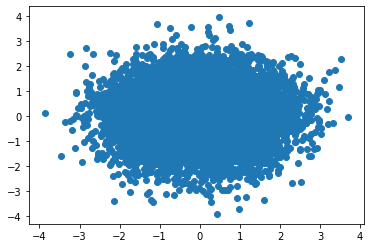

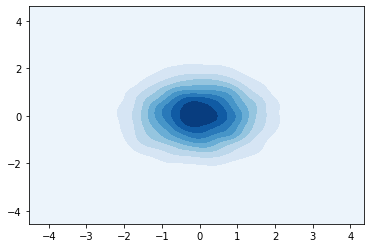

In [25]:
import seaborn as sns 
X,Y = Box_Muller(10000)

plt.figure()
plt.scatter(X,Y)
plt.show()

plt.figure()
sns.kdeplot(x=X, y=Y,cmap="Blues",fill=True, thresh=0 )
plt.show()



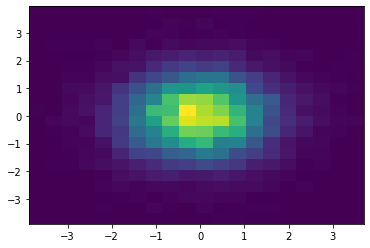

In [43]:
import plotly.graph_objects as go
h,x,y,image = plt.hist2d(X,Y,bins=20)
fig = go.Figure(data=[go.Surface(z=h, x=x, y=y)])
fig.show()
